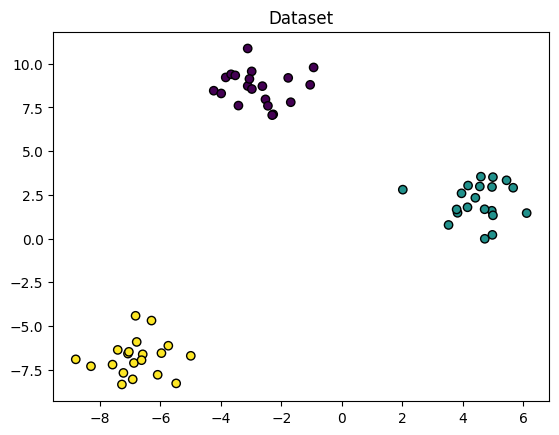

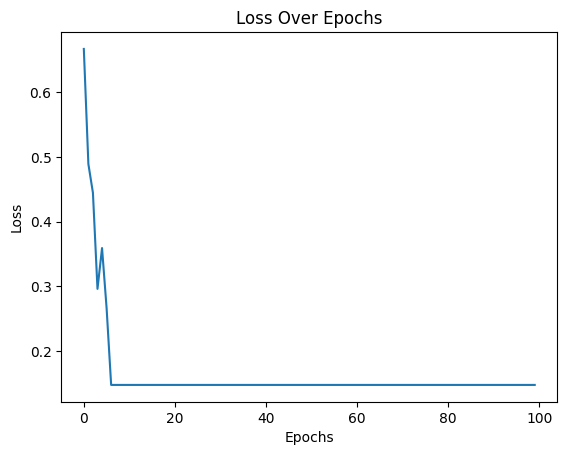

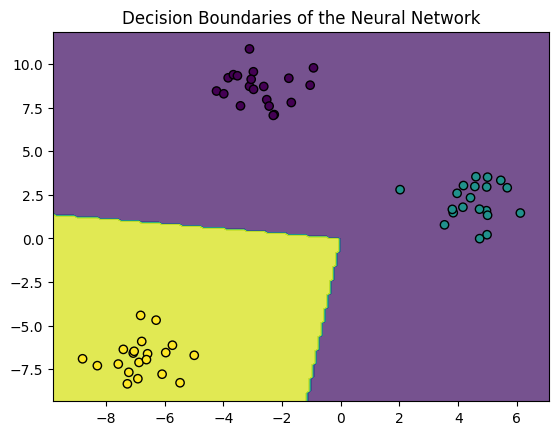

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):



        self.learning_rate = learning_rate
        self.weights = {
            "W1": np.random.randn(input_neurons, hidden_neurons[0]),
            "W2": np.random.randn(hidden_neurons[0], hidden_neurons[1]),
            "W3": np.random.randn(hidden_neurons[1], hidden_neurons[2]),
            "W4": np.random.randn(hidden_neurons[2], output_neurons),
        }

    @staticmethod
    def relu(x, derivative=False):


        if derivative:
            return (x > 0).astype(float)
        return np.maximum(0, x)

    @staticmethod
    def softmax(x):

        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward_pass(self, X):

        self.layers = {}
        self.layers["Z1"] = np.dot(X, self.weights["W1"])
        self.layers["A1"] = self.relu(self.layers["Z1"])

        self.layers["Z2"] = np.dot(self.layers["A1"], self.weights["W2"])
        self.layers["A2"] = self.relu(self.layers["Z2"])

        self.layers["Z3"] = np.dot(self.layers["A2"], self.weights["W3"])
        self.layers["A3"] = self.relu(self.layers["Z3"])

        self.layers["Z4"] = np.dot(self.layers["A3"], self.weights["W4"])
        output = self.softmax(self.layers["Z4"])
        return output

    def backward_pass(self, X, Y, output):


        deltas = {}


        deltas["delta4"] = self.learning_rate * (Y - output)


        deltas["delta3"] = (
            deltas["delta4"].dot(self.weights["W4"].T) * self.relu(self.layers["A3"], derivative=True)
        )


        deltas["delta2"] = (
            deltas["delta3"].dot(self.weights["W3"].T) * self.relu(self.layers["A2"], derivative=True)
        )


        deltas["delta1"] = (
            deltas["delta2"].dot(self.weights["W2"].T) * self.relu(self.layers["A1"], derivative=True)
        )


        self.weights["W4"] += self.layers["A3"].T.dot(deltas["delta4"])
        self.weights["W3"] += self.layers["A2"].T.dot(deltas["delta3"])
        self.weights["W2"] += self.layers["A1"].T.dot(deltas["delta2"])
        self.weights["W1"] += X.T.dot(deltas["delta1"])

    def train(self, X, Y, epochs):

        losses = []
        for epoch in range(epochs):
            output = self.forward_pass(X)
            loss = np.mean(np.square(Y - output))
            losses.append(loss)
            self.backward_pass(X, Y, output)
        return losses



np.random.seed(42)
X, Y = make_blobs(n_samples=60, centers=3, n_features=2, random_state=42)
Y_one_hot = np.zeros((Y.size, Y.max() + 1))
Y_one_hot[np.arange(Y.size), Y] = 1

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Dataset")
plt.show()
hidden_layers = [32, 16, 8]  #
nn = NeuralNetwork(input_neurons=2, hidden_neurons=hidden_layers, output_neurons=3, learning_rate=0.01)


epochs = 100
losses = nn.train(X, Y_one_hot, epochs)


plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = nn.forward_pass(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", edgecolor="k")
plt.title("Decision Boundaries of the Neural Network")
plt.show()
